In [1]:
# numpy提供了两种基本的类ndarray和ufunc
# ndarray是存储单一数据类型的多维数组，
# ufunc是能够对数组进行快速逐元素处理的通用函数,无需用户编写循环;
# numpy可以对所有数据进行快速的矩阵运算而无须编写循环程序;
# numpy的算法库时C语言写的,在内部将数据存储在连续的内存上,这与其他的python内建数据结构是不同的.
"# 函数库导入"
import numpy as np

# 在notebook中激活matplotlib
%matplotlib inline

In [2]:
# numpy可以针对全量数组进行复杂计算而不需要写python循环
# numpy的方法比python方法要快1到2个数量级甚至更多,并且使用的内存页更少.
import numpy as np
my_arr = np.arange(1000000)
my_lst = list(range(1000000))
%time for _ in range(10): my_arr = my_arr * 2

Wall time: 37.1 ms


In [3]:
import numpy as np
my_lst = list(range(1000000))
%time for _ in range(10): my_list2 = [x*2 for x in my_lst]

Wall time: 1.25 s


In [4]:
# numpy的核心特征之一就是N-维数组对象--ndarray
# ndarray是python中一个快速灵活的大型数据集容器.
# ndarray数组允许使用类似于标量的操作语法在整块数据上进行批量计算
"后文所述数组/numpy数组或ndarr均表示同一个对象:ndarray"
import numpy as np
data = np.random.randn(2, 3)
data

array([[-0.81376195, -0.16656095, -0.067117  ],
       [-0.1213733 , -1.51641343,  2.0216132 ]])

In [5]:
# 与标量运算就是逐元素的批量计算
# 所有的元素都同时乘以了10
data * 10

array([[ -8.13761951,  -1.66560952,  -0.67117004],
       [ -1.21373301, -15.16413431,  20.21613201]])

In [6]:
# 向量化操作即对应元素进行运算
data + data

array([[-1.6275239 , -0.3331219 , -0.13423401],
       [-0.2427466 , -3.03282686,  4.0432264 ]])

In [7]:
# 一个ndarray是一个通用的多维同类数据容器,即它包含的每个元素均为相同类型.
# 每个数组都有一个shape属性,用来表征数组每一维度的数量;
data.shape
# shape记录每一维的数量

(2, 3)

In [8]:
# ndim表示len(shape)
data.ndim

2

In [9]:
# 每个数组都有一个dtype属性,用来描述数组的数据类型;
# 除非显式地指定,否则np.array会自动推断生成的数组的数据类型.数据类型被存储在一个特殊的元数据dtype中.
data.dtype

dtype('float64')

In [10]:
# 创建数组
# 直接使用array函数,array函数接收任意的序列型对象,生成一个新的包含传递数据的numpy数组.
a = np.array([1,2,3,4])
b = np.array((5,6,7,8))
# 嵌套列表,例如同等长度的列表将会自动转换成多维数组.
c = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]])
for x in "abc":
    print("{}:\n{}".format(x, eval(x)))
    print("type({}):{}".format(x, type(eval(x))))
    print("{}.dtype: {}".format(x, eval(x).dtype))
    print("{}.shape: {}".format(x, eval(x).shape))
    print("{}.ndim: {}\n".format(x, eval(x).ndim))

a:
[1 2 3 4]
type(a):<class 'numpy.ndarray'>
a.dtype: int32
a.shape: (4,)
a.ndim: 1

b:
[5 6 7 8]
type(b):<class 'numpy.ndarray'>
b.dtype: int32
b.shape: (4,)
b.ndim: 1

c:
[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]]
type(c):<class 'numpy.ndarray'>
c.dtype: int32
c.shape: (3, 4)
c.ndim: 2



In [11]:
# 可以使用astype方法显式地转换数组的数据类型
arr = a.astype(np.float64)
arr.dtype

dtype('float64')

In [12]:
# reshape()可以创建一个变型的新数组，原数组的shape保持不变
d = np.arange(12).reshape(3,4)
d.shape = 4,3 # 只是改变每轴的大小，并没有进行转置
d

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [13]:
print("b: ", b)
print("b.shape: ", b.shape)
c = b.reshape(1,4) # 创建一个新尺寸的(视图的)新数组,原数组的shape不变,和原数组共享数据存储区域
print("b.shape: ", b.shape)
print("c.shape: ", c.shape)
print("c: ", c)

b:  [5 6 7 8]
b.shape:  (4,)
b.shape:  (4,)
c.shape:  (1, 4)
c:  [[5 6 7 8]]


In [14]:
# 原数组和reshape后数组共享数据存储区域,因此修改其中一个元素的值
# 会导致另一个数组中也能看到变化
b[1] = 100
print("b: ", b)
print("c: ", c)

b:  [  5 100   7   8]
c:  [[  5 100   7   8]]


In [15]:
# 数组生成函数
# array 将输入数据(列表,元组,数组以及其他序列)转换为ndarray,如不显式指明数据类型将自动推断,默认复制所有输入数据;
# asarray 将输入转换为ndarray,但如果输入已经是ndarray则不再复制;
# arange python内建函数range的数组版,返回一个数组;
# linspace 创建等差数列
# logspace 创建等比数列
# ones 根据给定形状和数据类型生成一个全1数组
# ones_like 根据所给数组生成一个形状一样的全1数组;
# zeros 根据给定形状和数据类型生成一个全0数组
# zeros_like 根据所给数组生成一个形状一样的全0数组;
# empty 根据给定形状生成一个没有初始值的空数组
# empty_like 根据所给数组生成一个形状一样但没有初始值的空数组;
# full 根据给定形状和数据类型生成一个指定数值的数组
# full_like 根据所给数组生成一个形状一样但内容是指定数值的数组;
# eye, identity 生成一个NxN特征矩阵(对角线位置都是1,其余位置是0)

# empty(),ones(),zeros() 可以创建指定型的数组
# empty_like(),ones_like(),zeros_like() 函数可以创建与参数数组型一样的数组
# frombuffer(),fromstring(),fromfile(),fromfunction()等可以从数组,字节序列,文件,函数等创建数组
"创建数组"
# arange函数可以通过指定开始值终止值和步长来创建一维数组
"# 数组不包括终值"
np.arange(0,10,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
"# linspace(start, end, count) 函数创建等差数列"
# 可以通过指定(开始值,终值,元素个数)来创建一维数组
# 注意和arange的区别,linspace第3个参数是表示元素个数而不是步长
"# linspace可以通过endpoint参数指定是否包含终值,缺省是包含的"
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [17]:
np.linspace(0,1,10,endpoint=False) #不包括终值

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [18]:
"# logspace(start, end, count) 函数创建等比数列"
"起始值和终值代表的是10的指数，如10^0, 10^2"
# 创建一个包含20个数字的等比数列
np.logspace(0,2,20)

array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ])

In [19]:
"# empty(),ones(),zeros()也可以创建指定型的数组"
np.empty((2,3), int) #只分配内存，不进行初始化

array([[         0,          0,          0],
       [1071644672,          0, 1072693248]])

In [20]:
"np.zeros创建数组元素默认是float"
np.zeros(4, float)

array([0., 0., 0., 0.])

In [21]:
"# empty_like(),ones_like(),zeros_like() 函数可以创建与参数数组型一样的数组"
np.ones_like(c)

array([[1, 1, 1, 1]])

In [22]:
# frombuffer(),fromstring(),fromfile(),fromfunction()等可以从数组,字节序列,文件,函数等创建数组
def func(i):
    return i%4 + 1
# np.fromfunction(函数名, (参数列表))
np.fromfunction(func, (10,))

array([1., 2., 3., 4., 1., 2., 3., 4., 1., 2.])

In [23]:
# 9*9乘法表
def func2(i, j):
    return (i+1) * (j+1)
a = np.fromfunction(func2, (9,9))
print(a)

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 2.  4.  6.  8. 10. 12. 14. 16. 18.]
 [ 3.  6.  9. 12. 15. 18. 21. 24. 27.]
 [ 4.  8. 12. 16. 20. 24. 28. 32. 36.]
 [ 5. 10. 15. 20. 25. 30. 35. 40. 45.]
 [ 6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 7. 14. 21. 28. 35. 42. 49. 56. 63.]
 [ 8. 16. 24. 32. 40. 48. 56. 64. 72.]
 [ 9. 18. 27. 36. 45. 54. 63. 72. 81.]]


In [24]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
"数组元素的存取方法"
# 和Python的标准方法相同
# 支持基础索引和切片
a[5]

5

In [26]:
"直接使用=赋值的数组(实际是一份引用),和原数组共享数据"
a = np.arange(10)
b = a
b[2] = 100
a

array([  0,   1, 100,   3,   4,   5,   6,   7,   8,   9])

In [27]:
# python 内建列表的切片会获取到一个全新的列表;
# numpy 的数组切片得到的是原数组的视图.如果要得到一份切片的拷贝而不是视图需要显式的复制即调用copy()方法;
"""通过下标范围获取的数组是原始数组的一个视图,和原始数组共享同一块存储空间"""
a = np.arange(10)
a[3:5]

array([3, 4])

In [28]:
a[:5]

array([0, 1, 2, 3, 4])

In [29]:
a[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [30]:
"通过下标范围获取的数组是原始数组的一个视图,和原始数组共享同一块存储空间"
a[2:4] = 100, 101
a

array([  0,   1, 100, 101,   4,   5,   6,   7,   8,   9])

In [31]:
# arr[start:end:step]
a[1:-1:2]

array([  1, 101,   5,   7])

In [32]:
a[::-1]

array([  9,   8,   7,   6,   5,   4, 101, 100,   1,   0])

In [33]:
# python list 通过下标范围获取到的数组不与原数组共享数据空间;
# np.ndarray 通过下标范围获取的数组与原始数组共享数据空间;
a = list(range(10))
b = a[:]
b[2] = 100
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
# np.ndarray 通过下标范围获取的数组与原始数组共享数据空间;
a = np.arange(10)
b = a[:]
b[2] = 100
a

array([  0,   1, 100,   3,   4,   5,   6,   7,   8,   9])

In [35]:
# 神奇索引
# 神奇索引是numpy中的术语,用于描述使用整数数组进行数据索引;
# 神奇索引即使用整数序列作为下标获得新数组,不和原始数组共享数据空间;
# 神奇索引与切片不同,神奇索引总是将数据复制到一个新的数组中;
"numpy中参数-1常常表示由系统自动计算得到的值"
x = np.arange(10, 1, -1)
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [36]:
# 神奇索引得到一个新的数组,不和原数组共享数据空间;
b = x[[3,3,1,8]]
b

array([7, 7, 9, 2])

In [37]:
b[2] = 100
b

array([  7,   7, 100,   2])

In [38]:
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [39]:
b = x[np.array([3,3,1,8])]
b

array([7, 7, 9, 2])

In [40]:
b[2] = 100
b

array([  7,   7, 100,   2])

In [41]:
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [42]:
# 注意传递多个索引数组时,会对应每个索引元组选出对应元素组成一个一维数组.
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [43]:
arr[[1,5,7,2], [0,3,1,2]]
# 选择[1,0], [5,3], [7,1], [2,2]

array([ 4, 23, 29, 10])

In [44]:
# 如果要选择矩阵中行列式的子集所形成的矩形区域
arr[:, [0,3,1,2]][[1,5,7,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [45]:
arr[[1,5,7,2]][:, [0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [46]:
"直接使用=赋值的数组(实际是一份引用),和原数组共享数据"
a = np.arange(10)
b = a #直接赋值,b和a有关联关系
b[[3,5,1]] = -1,-2,-3
a

array([ 0, -3,  2, -1,  4, -2,  6,  7,  8,  9])

In [47]:
a = np.arange(10)
b = a[:] #数组切片,b和a有关联关系
b[[3,5,1]] = -1,-2,-3
a

array([ 0, -3,  2, -1,  4, -2,  6,  7,  8,  9])

In [48]:
a = np.arange(10)
b = a[[3,5,1]] #神奇索引,b是一个全新数组
b

array([3, 5, 1])

In [49]:
b[[0,1,2]] = -1,-2,-3
b

array([-1, -2, -3])

In [50]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
"# 布尔数组"
# 当使用布尔数组作为下标存取数组x中的元素时,将收集x中所有在布尔数组中对应下标为True的元素;
# 使用布尔数组选择数据时总是生成数据的拷贝,即使返回的数组没有任何变化,即不和原数组共享数据空间
# 布尔值数组的长度必须和数组轴索引长度一致,即使不正确也不会报错(numpy 1.19.5上验证报错);
x = np.arange(5, 0, -1)
b = x[np.array([True, False, True, False, False])]
b

array([5, 3])

In [52]:
b = 1,2
b

(1, 2)

In [53]:
# 使用布尔数组选择数据时总是生成数据的拷贝,修改时不影响原数组
x

array([5, 4, 3, 2, 1])

In [54]:
# 不能使用布尔列表否则共享数据空间,这个结论应该是过时的,布尔列表也相当于是神奇索引了会得到一个拷贝
x = np.arange(5, 0, -1)
b = x[[True, False, True, False, False]]
b

array([5, 3])

In [55]:
b = 100,200
x

array([5, 4, 3, 2, 1])

In [56]:
# 布尔数组的长度要一致,否则会报错（numpy 1.19.5上验证报错)
x[np.array([True, False, True, True, False])]

array([5, 3, 2])

In [57]:
"# 布尔数组一般是使用布尔运算的ufunc函数产生的"
x = np.random.randn(10)
x

array([-0.26252656,  1.13227141,  0.79946968, -0.41627529, -0.29861446,
        0.08613726,  0.08652481, -1.23557913, -2.19887092,  0.01864084])

In [58]:
# 数组的比较操作(>,<,>=,<=, ==, !=, ~)也可以是向量化的,会产生一个布尔数组;
x > 0.5
# 得到一个布尔数组

array([False,  True,  True, False, False, False, False, False, False,
       False])

In [59]:
x[x > 0.5]

array([1.13227141, 0.79946968])

In [60]:
# 设置布尔数组的值也是可行的
x[x < 0.3] = 0
x

array([0.        , 1.13227141, 0.79946968, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [61]:
# 当组合多个布尔条件时,python的关键字and和or对布尔值数组并没有用,需要使用&和|来代替,注意加上小括号;
(x > 0.3) & (x <=0.8)

array([False, False,  True, False, False, False, False, False, False,
       False])

In [62]:
x[(x > 0.3) & (x <=0.8)]

array([0.79946968])

In [63]:
# 布尔值会被强制为1和0,因此sum通常可以用于计算布尔值数组中的True的个数
arr = np.random.randn(10)
arr

array([ 1.74041576,  0.16491914,  0.47754684, -0.54961474, -0.34536988,
        0.44198749,  0.53050505,  0.97185531,  0.82976201, -1.34379671])

In [64]:
bools = arr > 0
bools

array([ True,  True,  True, False, False,  True,  True,  True,  True,
       False])

In [65]:
bools.sum()

7

In [66]:
# 对于布尔值数组还有any和all方法,any用于检查数组中是否至少有一个True,all用于检查是否每个值都是True;
bools.any()

True

In [67]:
bools.all()

False

In [68]:
# 多维数组
"""broadcasting广播通常作为一个操作符,只有当数组的形状相同或者可兼容的(compatible),
数组间逐个元素(element-wise)的操作才是有效的。
"""
"""为了定义两个形状是否是可兼容的，Numpy从最后开始往前逐个比较它们的维度（dimensions）大小。
比较过程中，如果两者的对应维度相同，或者其中之一（或者全是）等于1，比较继续进行直到最前面的维度。
当其中之一的形状的维度超出范围（例如，a1 的shape=（2,3,4）
而a2的shape=（3,4），当a1的2超出a2范围），此时Numpy将会使用1
进行比较（如将a2.shape替换为(1,3,4)）直到另一个也超出dim范围。
一旦Numpy确定两者的形状是可兼容的，
最终结果的形状就成了每个维度上取两者之间最大的形状尺寸。
"""
# 最后再举个例子
a = np.arange(5).reshape(5,1)
# a.shape == (5, 1)
b = np.arange(5)
# b.shape == (5,)
c = a + b
# b.shape 会被先扩展为(1, 5)
# 然后最终的shape将取二者中的最大值
c.shape == (5, 5)
c

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [69]:
a = np.arange(0, 20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [70]:
# 二维数组中每个索引值对应的元素不再是一个值,而是一个一维数组;
a[2]

array([10, 11, 12, 13, 14])

In [71]:
# 单个元素可以通过递归的方式获得
a[2][0]

10

In [72]:
# 可以通过传递一个索引的逗号分隔列表来选择单个元素
a[2, 0]
# 可以将0轴看作行,将1轴看作列

10

In [73]:
# 对二维数组可以进行多组切片,与多组索引类似
a[0, 3:5]

array([3, 4])

In [74]:
a[4:, 4:]

array([], shape=(0, 1), dtype=int32)

In [75]:
# 单独一个冒号表示选择整个轴上的数组
a[:, 2]

array([ 2,  7, 12, 17])

In [76]:
a[2::2, ::2]

array([[10, 12, 14]])

In [77]:
a1 = np.arange(0, 60, 10).reshape(-1, 1)
a1

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50]])

In [78]:
a2 = np.arange(0,6)
a2

array([0, 1, 2, 3, 4, 5])

In [79]:
# 广播特性
a = a1 + a2
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [80]:
# 神奇索引
a[(0,1,2,3,4),(1,2,3,4,5)]

array([ 1, 12, 23, 34, 45])

In [81]:
a[3:, [0,2,5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [82]:
# 布尔索引
mask = np.array([1,0,1,0,0,1], dtype=bool)
a[mask, 2]

array([ 2, 22, 52])

In [83]:
#数组的元素类型可以通过dtype属性获得,可以通过dtype参数在创建时指定元素类型
import numpy as np
np.array([[20, 22, 24],[40, 42, 44]], dtype=float)

array([[20., 22., 24.],
       [40., 42., 44.]])

In [84]:
np.array([[20, 22, 24],[40, 42, 44]], dtype=complex)

array([[20.+0.j, 22.+0.j, 24.+0.j],
       [40.+0.j, 42.+0.j, 44.+0.j]])

In [85]:
# 结构体数组
import numpy as np
persontype = np.dtype({
    "names":['name', 'age', 'weight'],
    "formats": ['S32', 'i', 'f']
    })
a = np.array([("Zhang", 32, 75.5),("Wang", 24, 65.2)], dtype=persontype)
a.dtype
# | 表示忽略字节顺序
# < 低位字节在前
# > 高位字节在前

dtype([('name', 'S32'), ('age', '<i4'), ('weight', '<f4')])

In [86]:
"每个元素将是dtype类型"
"每个元素看上去像是元组，实际上它是一个结构"
a[0]

(b'Zhang', 32, 75.5)

In [87]:
a[0].dtype

dtype([('name', 'S32'), ('age', '<i4'), ('weight', '<f4')])

In [88]:
"结构可以像字典一样通过字符串下标获取对应的字段值"
c = a[1]
c["name"] = "Li"
a[1]

(b'Li', 24, 65.2)

In [89]:
# reshape用于改变数组的形状
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [90]:
# resize用于改变数组的大小
a.resize((1,12))
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [91]:
# ravel 用于转换为一维数组,非必要不产生源数据的副本
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [92]:
# flatten 用于转换为一维数组,返回源数据的副本
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [93]:
a.shape = (1,12)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [94]:
a.reshape(1,12)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [95]:
a.shape = 3, 4
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [96]:
# 数组算术
# 数组之所以重要是因为它允许进行批量操作而无须任何for循环,numpy用户称这种特性为向量化;
# 任何两个等尺寸的数组之间的算术操作都应用了逐元素操作的方式
arr = np.array([[1,2,3], [4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [97]:
arr + arr

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [98]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [99]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

In [100]:
# 带有标量计算的算术操作,会把计算参数传递给数组的每个元素
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [101]:
arr * 0.5

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [102]:
# 数组的比较会产生一个布尔数组
arr > 5

array([[False, False, False],
       [False, False,  True]])

In [103]:
# 不同尺寸数组间的操作将会用到广播特性
b = np.array([1])
b

array([1])

In [104]:
arr + b

array([[2, 3, 4],
       [5, 6, 7]])

In [105]:
c = np.arange(3)
c

array([0, 1, 2])

In [106]:
arr - c

array([[1, 1, 1],
       [4, 4, 4]])

In [107]:
# numpy.where 函数是三元表达式`x if condition else y`的向量化
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True, False, True, True, False])
# 假设cond中的元素为True时,取xarr中的对应元素值,否则取yarr中的元素;

In [108]:
# 可以使用python的列表推导式来完成
# 如果数组很大的话速度会很慢,因为所有的工作都是通过解释器解释python代码完成的,其次当数组时多维时就无法凑效了;
result = [(x if c else y) for x,y,c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [109]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [110]:
# np.where 的第二个和第三个参数并不需要是数组,也可以是标量
arr = np.random.randn(4, 5)
arr

array([[-1.71572559, -0.19169632,  1.04443794, -1.50796414,  0.81530573],
       [ 1.51794229, -1.01534095,  0.41742804, -0.85012367,  0.64855089],
       [ 1.38126945,  0.37240891,  0.91051203,  0.08371198, -0.18009335],
       [ 1.47991206, -0.64905653, -1.38920562,  2.04831768,  0.28391092]])

In [111]:
arr > 0

array([[False, False,  True, False,  True],
       [ True, False,  True, False,  True],
       [ True,  True,  True,  True, False],
       [ True, False, False,  True,  True]])

In [112]:
# 将所有正值替换为2,所有负值替换为-2
np.where(arr > 0, 2, -2)

array([[-2, -2,  2, -2,  2],
       [ 2, -2,  2, -2,  2],
       [ 2,  2,  2,  2, -2],
       [ 2, -2, -2,  2,  2]])

In [113]:
# 可以使用标量和数组联合
# 近将所有正值替换为2
np.where(arr > 0, 2, arr)

array([[-1.71572559, -0.19169632,  2.        , -1.50796414,  2.        ],
       [ 2.        , -1.01534095,  2.        , -0.85012367,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        , -0.18009335],
       [ 2.        , -0.64905653, -1.38920562,  2.        ,  2.        ]])

In [114]:
# 聚合函数
# 也叫缩减函数,比如sum,mean和std既可以直接调用数组示例的方法,也可以使用顶层的numpy函数
arr.mean()

0.17522508668620185

In [115]:
# 像mean,sum等函数还可以接收一个可选参数axis,这个参数可以用于计算给定轴向上的统计值,形成一个下降一维度的数组
arr.mean(axis=1)

array([-0.31112848,  0.14369132,  0.5135618 ,  0.3547757 ])

In [116]:
a = np.arange(12).reshape(3,4)
np.sum(a)

66

In [117]:
np.sum(np.sum(a, axis=1), axis=0)

66

In [118]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [119]:
idx = np.unravel_index(7, a.shape)
idx

(1, 3)

In [120]:
a = np.array([[7,1,9,6,3],
              [5,1,3,8,2],
              [9,8,9,4,0],
              [9,5,1,7,0]])
a

array([[7, 1, 9, 6, 3],
       [5, 1, 3, 8, 2],
       [9, 8, 9, 4, 0],
       [9, 5, 1, 7, 0]])

In [121]:
# argmin,argmax用于返回最小值和最大值的位置
idx = np.argmax(a, axis=1)
idx

array([2, 3, 0, 0], dtype=int64)

In [122]:
a[idx]

array([[9, 8, 9, 4, 0],
       [9, 5, 1, 7, 0],
       [7, 1, 9, 6, 3],
       [7, 1, 9, 6, 3]])

In [123]:
idx = np.argmin(a, axis=0)
idx

array([1, 0, 3, 2, 2], dtype=int64)

In [124]:
a[idx]

array([[5, 1, 3, 8, 2],
       [7, 1, 9, 6, 3],
       [9, 5, 1, 7, 0],
       [9, 8, 9, 4, 0],
       [9, 8, 9, 4, 0]])

In [125]:
a

array([[7, 1, 9, 6, 3],
       [5, 1, 3, 8, 2],
       [9, 8, 9, 4, 0],
       [9, 5, 1, 7, 0]])

In [126]:
# 选出每行最大值
idx = np.argmax(a, axis=1)
a[range(a.shape[0]), idx]

array([9, 8, 9, 9])

In [127]:
# 数组拥有 transpose() 方法,也有特殊的T属性
a = np.array(
      [[7, 1, 9, 6, 3],
       [5, 1, 3, 8, 2],
       [9, 8, 9, 4, 0],
       [9, 5, 1, 7, 0]])
idx = np.argmin(a, axis=0)
idx

array([1, 0, 3, 2, 2], dtype=int64)

In [128]:
a = a.transpose()
a

array([[7, 5, 9, 9],
       [1, 1, 8, 5],
       [9, 3, 9, 1],
       [6, 8, 4, 7],
       [3, 2, 0, 0]])

In [129]:
a[range(a.shape[0]), idx]

array([5, 1, 1, 4, 0])

In [130]:
a.T

array([[7, 1, 9, 6, 3],
       [5, 1, 3, 8, 2],
       [9, 8, 9, 4, 0],
       [9, 5, 1, 7, 0]])

In [131]:
# 当计算矩阵内积会使用 np.dot
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [132]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [133]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [134]:
a2 = np.floor(10*np.random.random((2,2)))
a2

array([[2., 8.],
       [5., 1.]])

In [135]:
b2 = np.floor(10*np.random.random((2,2)))
b2

array([[5., 4.],
       [8., 1.]])

In [136]:
np.hstack((a2,b2))

array([[2., 8., 5., 4.],
       [5., 1., 8., 1.]])

In [137]:
np.hstack((a2,b2)).shape

(2, 4)

In [138]:
np.vstack((a2,b2))

array([[2., 8.],
       [5., 1.],
       [5., 4.],
       [8., 1.]])

In [139]:
np.vstack((a2,b2)).ravel()

array([2., 8., 5., 1., 5., 4., 8., 1.])

In [140]:
np.vstack((a2,b2)).ravel().shape

(8,)

In [141]:
# 通用函数
# 也称ufunc,是一种在ndarray数据中进行逐元素操作的函数,是对一些简单函数的向量化封装
# 一元通用函数
arr = np.arange(12)

In [142]:
arr ** 0.5

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ,
       3.16227766, 3.31662479])

In [143]:
# 与 (arr ** 0.5) 等价
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ,
       3.16227766, 3.31662479])

In [144]:
np.fabs(arr)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [145]:
arr ** 2

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [146]:
# 与 (arr ** 2) 等价
np.square(arr)

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [147]:
# 求每个元素的自然对数
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03, 2.20264658e+04, 5.98741417e+04])

In [148]:
# 计算每个元素的最小整数值
np.floor(arr)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [149]:
# 三角函数
np.sin(arr)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111, -0.99999021])

In [150]:
np.cos(arr)

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362,
        0.28366219,  0.96017029,  0.75390225, -0.14550003, -0.91113026,
       -0.83907153,  0.0044257 ])

In [151]:
# arccos参数范围[-1,1]
cos_val = np.random.random(12) * 2 -1
cos_val

array([-0.28354032, -0.56511683, -0.59547202, -0.92624167,  0.73102804,
        0.79259692, -0.44011604,  0.8931945 , -0.38625835,  0.38453351,
        0.93538916, -0.25432333])

In [152]:
np.degrees(np.arccos(cos_val))

array([106.47161641, 124.41040472, 126.54628852, 157.85633943,
        43.02735224,  37.57113525, 116.11128539,  26.7225477 ,
       112.72188237,  67.38521716,  20.70889186, 104.73349288])

In [153]:
# 二元通用函数
# 比如 add() 或 maximum() 会接收两个数组并返回一个数组作为结果
xarr = np.random.normal(size=8)
xarr

array([ 1.04553792, -0.2278116 , -0.39481265,  0.44290763, -0.64403828,
       -0.45367998, -0.17989635,  0.37379805])

In [154]:
yarr = np.random.normal(size=8)
yarr

array([ 0.31388186,  1.03585244, -1.04671606, -0.53532479,  1.73475205,
       -1.60490395, -1.03546734,  1.89168632])

In [155]:
np.maximum(xarr, yarr)

array([ 1.04553792,  1.03585244, -0.39481265,  0.44290763,  1.73475205,
       -0.45367998, -0.17989635,  1.89168632])

In [156]:
# 伪随机数生成
# numpy.random 模块填补了python内建的random模块的不足,可以高效的生成多种概率分布下的完整样本值数组
# np.random.normal(均值,标准差,size) 可以从一个正态分布样本中获取一个size大小的数组
# np.random.normal(size=10) 简化为 np.random.randn(10)
# normal(loc=0.0,scale=1.0,size=None) 如果需要指定数组大小不能直接normal(10)而要normal(size=10)
samples = np.random.normal(size=10)
samples

array([ 1.05383865, -0.40470885,  0.08887976,  0.90285937,  1.2246941 ,
       -0.96027896, -1.30988705,  0.48375572,  0.48709715,  0.69954298])

In [157]:
np.std(samples)

0.8174654173592453

In [158]:
np.mean(samples)

0.22657928665777413

In [159]:
# rand(d0, d1,..., dn)   从均匀分布中抽取样本,等价于uniform(size=(d0,d1,...,dn))
# randn(d0, d1,..., dn)  从均值0标准差1的正态分布中抽取样本(matlab型接口)

# normal(loc=0.0, scale=1.0, size=None) 从正态(高斯)分布中抽取样本
# uniform(low=0.0, high=1.0, size=None) 从均匀分布中抽取样本

# random(size=None) 从'[0,1)'区间随机抽取样本,近似于uniform(0,1,size)
# randint(low, high=None, size=None, dtype=int) 从'[low, high)'范围抽取随机整数
np.random.random(12)

array([0.77282566, 0.56513398, 0.0603541 , 0.92614127, 0.40266812,
       0.25507421, 0.42014286, 0.09224741, 0.11111507, 0.41097217,
       0.74727606, 0.60411849])

In [160]:
np.random.normal(size=10)

array([-0.08900207, -0.58789531, -2.66838425,  0.38871379, -1.4604649 ,
       -0.28280586,  0.66958085,  1.5176948 , -0.34877351,  0.55560405])

In [161]:
np.random.uniform(size=10)

array([0.9532278 , 0.90833183, 0.36511794, 0.87750437, 0.79009469,
       0.67093585, 0.71462597, 0.57873067, 0.60187961, 0.364854  ])

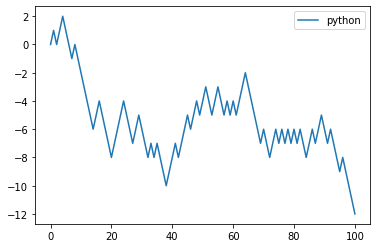

In [162]:
# 示例:随机漫步
# 从0开始,步进为1或-,且两种步进概率相等

# 纯python实现
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 100
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:], label="python")
plt.legend(loc='best')

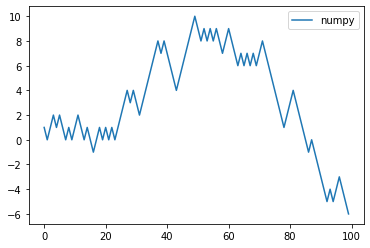

In [163]:
# numpy 实现
import numpy as np
import matplotlib.pyplot as plt
nsteps = 100
arr = np.random.randint(0, 2, size=nsteps)
steps = np.where(arr > 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk[:], label="numpy")
plt.legend(loc='best')

In [164]:
# 其他统计信息
walk.min()

-6

In [165]:
walk.max()

10

In [166]:
# 线性代数 linear algebra
# numpy的线性代数中*是矩阵的逐元素乘积,而不是矩阵的点乘积,numpy的 dot() 函数用于矩阵操作
x = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [167]:
y = np.array([
    [6, 23],
    [-1, 7],
    [8, 9]
])
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [168]:
# 等价于 np.dot(x, y)
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

In [169]:
# 一个二维数组和一个长度合适的一维数组之间的矩阵乘积结果是一个一维数组
np.dot(x, np.ones(3))

array([ 6., 15.])

In [170]:
x @ np.ones(3)

array([ 6., 15.])

In [171]:
# numpy.linalg 拥有一个矩阵分解的标准函数集,以及其他常用函数,例如求逆和行列式求解;
X = np.array([
    [-1, 1, 0],
    [-4, 3, 0],
    [1, 0 , 2]
])
X.T

array([[-1, -4,  1],
       [ 1,  3,  0],
       [ 0,  0,  2]])

In [172]:
np.linalg.det(X)

1.9999999999999998

In [173]:
np.linalg.svd(X)

(array([[-0.26493419,  0.07450021, -0.96138421],
        [-0.94758935,  0.16451025,  0.273881  ],
        [ 0.17856174,  0.98355788,  0.02701122]]),
 array([5.26411099, 2.06281675, 0.18418078]),
 array([[ 0.80428649, -0.59035652,  0.06784118],
        [ 0.12168637,  0.27536666,  0.95360664],
        [-0.5816491 , -0.75871759,  0.29331202]]))

In [174]:
w, v = np.linalg.eig(X)
w

array([2., 1., 1.])

In [175]:
v

array([[ 0.        ,  0.40824829,  0.40824829],
       [ 0.        ,  0.81649658,  0.81649658],
       [ 1.        , -0.40824829, -0.40824829]])

In [176]:
# dot 矩阵点乘积
mat = X.T.dot(X)
mat

array([[ 18, -13,   2],
       [-13,  10,   0],
       [  2,   0,   4]])

In [177]:
# inv 方阵求逆矩阵
np.linalg.inv(mat)

array([[10.  , 13.  , -5.  ],
       [13.  , 17.  , -6.5 ],
       [-5.  , -6.5 ,  2.75]])

In [178]:
mat.dot(np.linalg.inv(mat))

array([[ 1.00000000e+00, -8.88178420e-15,  2.04281037e-14],
       [ 3.90798505e-14,  1.00000000e+00, -1.95399252e-14],
       [-3.55271368e-15,  0.00000000e+00,  1.00000000e+00]])

In [179]:
# qr 计算QR分解
q, r = np.linalg.qr(mat)
q

array([[-0.80741035, -0.1179821 , -0.57807331],
       [ 0.5831297 , -0.30856857, -0.75149531],
       [-0.08971226, -0.9438568 ,  0.31794032]])

In [180]:
r

array([[-22.29349681,  16.32763147,  -1.97366974],
       [  0.        ,  -1.55191839,  -4.01139141],
       [  0.        ,   0.        ,   0.11561466]])